### Popular Data Science Questions

The questions asked on the community sites are specific to the particular field and are focused on helping those interested in the field to learn more about the  field.

Each post is has a post is a question, with practical answers and tags to specifiew which branches of the field it serves. These play a role in attracting the professionals, experts and the learners

The questions, ofcourse have answers attached to them. The aanswers are set in such a way that they are practical solutions. Then Tags are placed on the questions to help classify them to a specific branch in the field. Then there is a reputation attained by the people that ask the questions.
The tags help direct the people to questions that are really interesting thus attraction  traffic, then the practical nature of the answers just make more and more people come to the site as their problems are solved. Then, the idea of a reputation pushes people to ask better questions so that they can earn more preveledges.


#### Data Science Stack Exchange Tables

On investigation, I looked at the Posts, Tags, Comments and Votes tables. There are also tables with like Post Type,Post Links, Post Feed Back, Vote Types, Users etc. that seem to contain information that will help us explain the behaviour of certain coulumns in the Posts, Comments and Votes.

##### Investigating the Posts Table

Focusing on the tables that seem relevant, we started with posts table. In it we extracted data for the columns (Id,PostTypeId, CreationDate, Score, ViewCount, Tags, AnswerCount, FavoriteCount) which seemed important. In addition to that we also extracted only Questions that were created in 2019.

In [1]:
import pandas as pd

In [2]:
questions = pd.read_csv("2019_questions.csv")

In [3]:
questions.shape

(8839, 7)

In [4]:
questions.head(20)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN
5,44430,2019-01-23 11:13:32,0,283,<fuzzy-logic>,1,NaN
6,44432,2019-01-23 11:17:46,1,214,<time-series><anomaly-detection><online-learning>,0,1.0
7,44436,2019-01-23 12:49:39,0,9,<matrix-factorisation>,0,NaN
8,44437,2019-01-23 13:04:11,0,7,<correlation><naive-bayes-classifier>,0,NaN
9,44438,2019-01-23 13:16:29,0,584,<machine-learning><python><deep-learning><kera...,1,NaN


In [5]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null object
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


In [6]:
questions.isnull().sum()

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    7432
dtype: int64

All the columns except FavoriteCount have no nulls. The nulls in this particular column are also so many, almost 85% of the column. The columns are of the appropraite types, the numeric are either of int and float while the others are objects.
There is need to clean and organise the Tags column, if possible quantify it if we are going to put to use the tags.

In [7]:
questions["FavoriteCount"] = questions["FavoriteCount"].fillna(0)

In [8]:
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)

In [9]:
questions["Tags"] = questions["Tags"].str.replace("^<|>$","")

In [10]:
questions["Tags"] = questions["Tags"].str.split("><")

In [11]:
questions["Tags"].sample(5)

7343                                     [error-handling]
3561                    [scikit-learn, feature-selection]
4834            [machine-learning, convnet, pytorch, gan]
7874    [python, decision-trees, categorical-data, fea...
6569        [nlp, similar-documents, vector-space-models]
Name: Tags, dtype: object

In [12]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,0
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,0


#### Most used and viewed tags
Here we counted the number of times a tag was used and number of times each tag was viewed

In [13]:
tag_count = {}
for tags in questions["Tags"]:
    for tag in tags:
        if tag not in tag_count:
            tag_count[tag] = 1
        else:
            tag_count[tag] += 1

In [14]:
tag_count = pd.DataFrame.from_dict(data = tag_count, orient = "index")

In [15]:
tag_count.head()

,0
allennlp,2
object-detection,109
ibm-watson,1
jaccard-coefficient,4
numpy,117


In [16]:
tag_count.rename(columns = {0: "Tag Frequency"}, inplace = True)

In [17]:
tag_count.sort_values(by = "Tag Frequency", ascending = False, inplace = True)

In [18]:
tag_count.head(20)

,Tag Frequency
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


In [19]:
view_count = {}

for index, row in questions.iterrows():
    for tag in row["Tags"]:
        if tag in view_count:
            view_count[tag] += row["ViewCount"]
        else:
            view_count[tag] = row["ViewCount"]

In [20]:
view_count = pd.DataFrame.from_dict(view_count, orient = "index")

In [21]:
view_count.rename(columns = {0: "Tag Views"}, inplace = True)

In [22]:
view_count.sort_values(by = "Tag Views", ascending = False, inplace = True)

In [23]:
view_count.head(20)

,Tag Views
python,537585
machine-learning,388499
keras,268608
deep-learning,233628
pandas,201787
neural-network,185367
scikit-learn,128110
tensorflow,121369
classification,104457
dataframe,89352


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

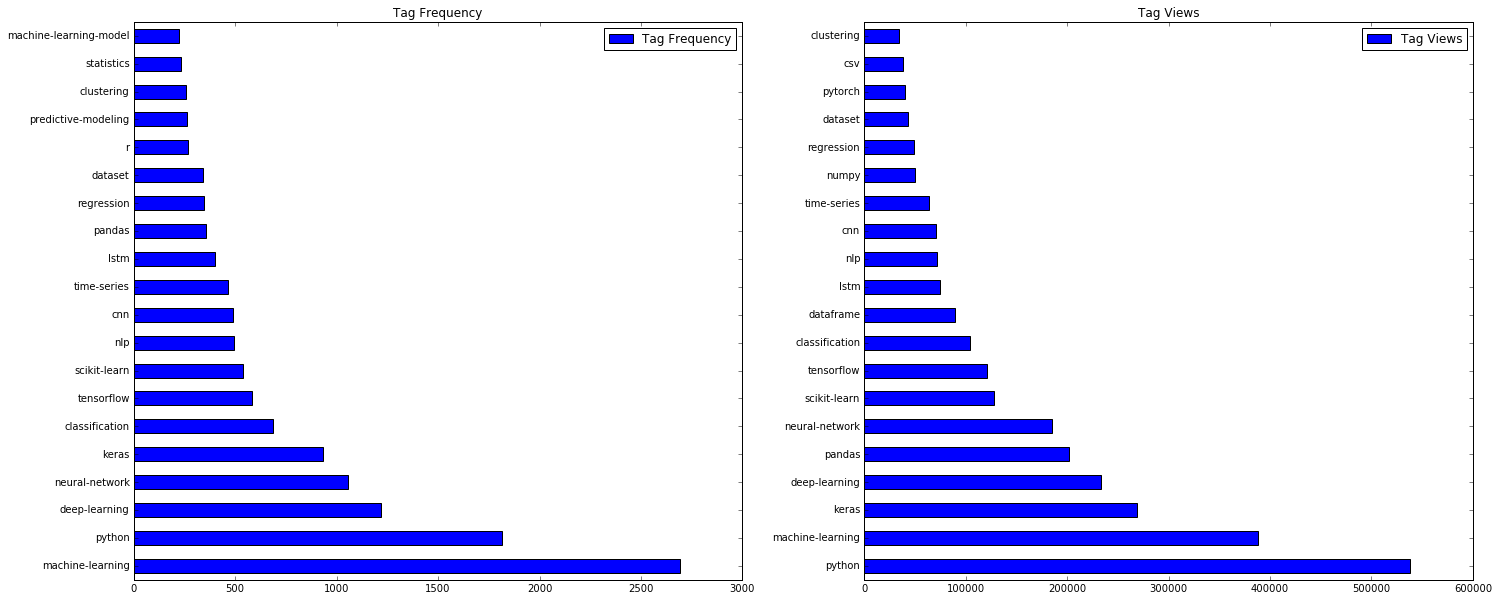

In [25]:
fig,axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches((24, 10))
tag_count.head(20).plot(kind="barh", ax=axes[0], subplots=True)

view_count.head(20).plot(kind="barh", ax=axes[1], subplots=True)
plt.show()

Machine learning, Python, Nueral Network, deep learning and Keras are the most tagged with Machine learning having a large number of tags. The same are also the most viewed but with Python having the most views.
This might be because these tags are related, each and every time machine learning is tagged, deep learning is tagged.

From the DSSE Tag site (https://datascience.stackexchange.com/tags) there could be an explanation for the frequent use and views of Machine learning, Python, Nueral Network, deep learning and Keras tags. 
Machine Laerning involves building of automated applications to improve experience; while Nueral Network is one of the Machine Learning Methods and mimics the biological nuerons; Deep Learning is a new area of Machine learning concerned with the technologies used for learning hierarchical representations of data; Python is the preferred Data Science programming language wherals Kears is a minimalist, highly modular neural network library written in Python.
All these tags have a connecting relationship and are easily used interchangeably thus the hugh frequency

#### More analysis on Deep Learning
In this analysis we are going try and comfirm whether Deep Learning is here to stay. We obtained data from the DSSE using this querry:

SELECT Id, CreationDate, Tags
  FROM posts
 WHERE PostTypeId = 1;

In [26]:
all_answers = pd.read_csv("all_questions.csv", parse_dates = ["CreationDate"])

In [27]:
all_answers.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


In [28]:
all_answers.isnull().sum()

Id              0
CreationDate    0
Tags            0
dtype: int64

In [29]:
all_answers["Tags"] = all_answers["Tags"].str.replace("^<|>$","")

In [30]:
all_answers["Tags"] = all_answers["Tags"].str.split("><")

In [31]:
all_answers["Tags"].sample(5)

15668           [python, scikit-learn, recommender-system]
13524    [machine-learning, python, scikit-learn, machi...
7903                      [dataset, open-source, crawling]
5874     [machine-learning, neural-network, deep-learni...
20720    [feature-selection, feature-engineering, corre...
Name: Tags, dtype: object

From the DSSE we classified the following as deep learning tags ("lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning") so we list for them and estract the rows that have deep learning in them.

In [32]:
deep_learning = ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]

In [33]:
def deep_learner(tags):
    for tag in tags:
        if tag in deep_learning:
            return 1
        else:
            return 0

In [34]:
all_answers["DeepLearning"] = all_answers["Tags"].apply(deep_learner)

In [35]:
all_answers.head()

,Id,CreationDate,Tags,DeepLearning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",0
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0


The Data we have from DSSE for 2020 might not be complete so we focus on the earlier years

In [36]:
all_answers = all_answers[all_answers["CreationDate"].dt.year < 2020]

In [37]:
all_answers.head()

,Id,CreationDate,Tags,DeepLearning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",0
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0


We will implement Quarterly time frame to study the behaviour of deep learning

In [38]:
def quarter(time):
    year = str(time.year)
    quarter = str(((time.month -1))//3 + 1)
    return year + "Q" + quarter

In [39]:
all_answers["Quarter"] = all_answers["CreationDate"].apply(quarter)

In [40]:
all_answers.head()

,Id,CreationDate,Tags,DeepLearning,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",0,2019Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,2019Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,2019Q1
3,45426,2019-02-12 04:51:49,[keras],1,2019Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,2019Q1


##### Questions per quarter

In [41]:
Questions_by_quarter = all_answers.groupby("Quarter").agg({"DeepLearning" : ['sum', 'size']})

In [42]:
Questions_by_quarter

DeepLearning      
                 sum  size
Quarter                   
2014Q2             3   157
2014Q3             4   189
2014Q4             4   216
2015Q1             5   190
2015Q2             6   284
2015Q3            13   311
2015Q4            19   382
2016Q1            38   516
2016Q2            45   518
2016Q3            69   585
2016Q4            76   527
2017Q1           105   698
2017Q2           105   647
2017Q3           116   714
2017Q4           146   898
2018Q1           214  1221
2018Q2           260  1448
2018Q3           329  1512
2018Q4           260  1294
2019Q1           411  1987
2019Q2           504  2393
2019Q3           508  2394
2019Q4           411  2036

In [43]:
Questions_by_quarter.columns = ["Deep_Learning", "Total_Questions"]

In [44]:
Questions_by_quarter["Deep_Learning_Percent"] = round((Questions_by_quarter["Deep_Learning"]/Questions_by_quarter["Total_Questions"])*100, 2)

In [45]:
Questions_by_quarter

,Deep_Learning,Total_Questions,Deep_Learning_Percent
Quarter,,,
2014Q2,3,157,1.91
2014Q3,4,189,2.12
2014Q4,4,216,1.85
2015Q1,5,190,2.63
2015Q2,6,284,2.11
2015Q3,13,311,4.18
2015Q4,19,382,4.97
2016Q1,38,516,7.36
2016Q2,45,518,8.69


The questions concering Deep Learning have kept increasing over the the quarters which implies that it is heare to stay

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb244e8d30>],
      dtype=object)

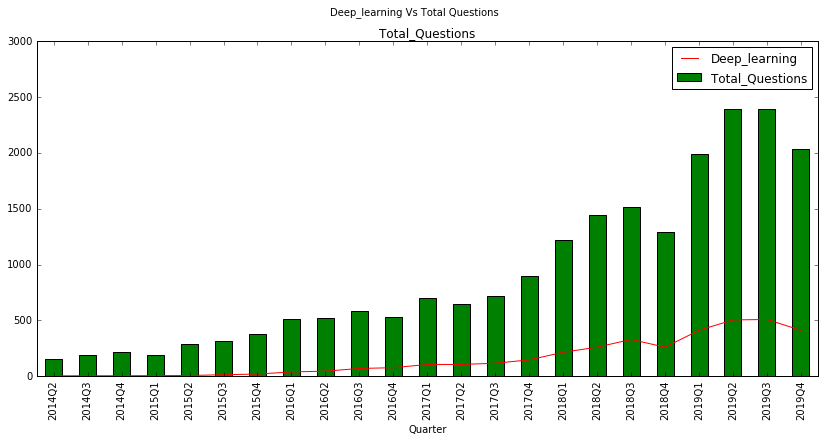

In [46]:
fig, axes = plt.subplots()
fig.set_size_inches((14, 6))
plt.ylim(0, 3000)
Questions_by_quarter["Deep_Learning"].plot(kind="line", color='red', subplots=True, label="Deep_learning", legend=True, title = "Deep_learning Vs Total Questions")
Questions_by_quarter["Total_Questions"].plot(kind="bar", color='green', subplots=True, label="Total_Questions", legend=True)

From the chart, Deep Learning qustions have been growing compared to the rest of the other data science questions. They contribute 20% towards the total questions and they might have taken a low in the last two quarters but I believe they will rise inpopularity in 2020.

Thank You